In [1]:
import pandas as pd
import numpy as np
#import graphviz
import matplotlib.pyplot as plt
import pickle
import timeit
import itertools
import Water_Conservation_Helper_Functions
from Water_Conservation_Helper_Functions import *

In [2]:
%matplotlib inline
# suppress warnings
import warnings
warnings.filterwarnings('ignore')

#set display options
pd.set_option('max_columns', 150)
pd.set_option('max_rows', 110)
# control precision
pd.set_option('precision',4)

In [3]:
#set input/output paths
#can eventually set this to the SOAPY API https://dev.socrata.com/foundry/data.waterpointdata.org/gihr-buz6
DATA_PATH = "~chandler.mccann/Downloads/"
#DATA_PATH = "/Users/chandlermccann/Google Drive/Google Drive/Berkeley MIDS 2016/W210-Capstone_WaterProject"
INPUT_FILE = os.path.join(DATA_PATH, "cleaned_water_data2.csv") #after running prep_water_data.py


In [4]:
df = pd.read_csv(INPUT_FILE)

In [5]:
features = ['water_source', 'water_tech', 'management',
       'source', 'adm1', 'adm2', 'pay', 'lat_deg', 'lon_deg',
       'new_install_year', 'age_well_years','time_since_meas_years', 'fuzzy_water_source',
        'fuzzy_water_tech','status_binary']

In [19]:
features_no_pay_sl = ['water_source', 'water_tech', 'management',
       'source', 'adm1', 'adm2', 'installer', 'lat_deg', 'lon_deg',
       'new_install_year', 'age_well_years','time_since_meas_years', 'fuzzy_water_source',
        'fuzzy_water_tech','status_binary']

# Sierra Leone

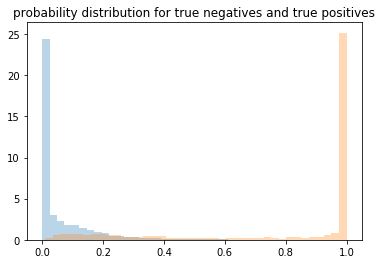

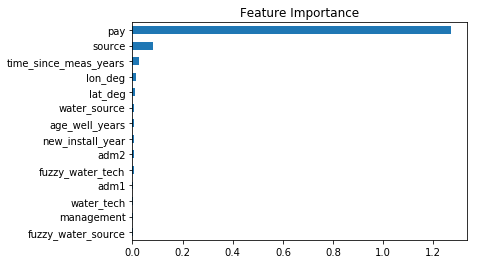

Confusion matrix, without normalization
[[8378  110]
 [ 587 1898]]


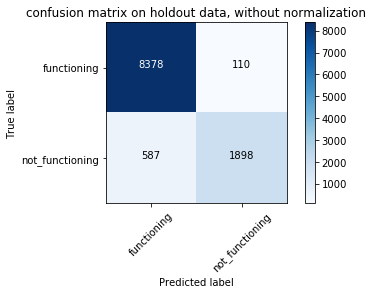

Normalized confusion matrix
[[ 0.98704053  0.01295947]
 [ 0.2362173   0.7637827 ]]


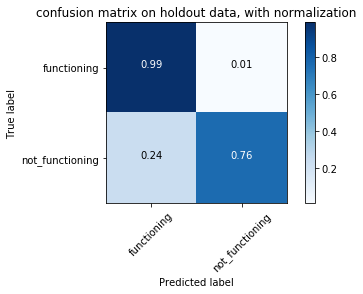

In [6]:
country = 'Sierra Leone'
model_sierra = pickle.load(open('Sierra Leone Holdout using TVH_pickle.sav', 'rb'))
y_holdout, probs, preds = summarize_country(country,df, features, model_sierra)

# The pay column in Sierra Leone overfit.  Upon investigation, "no water" was a value and was giving away the answer. Rerunning without pay below, and with "installer" as a new feature

In [ ]:
country = 'Sierra Leone'
model_sierra_no_pay = pickle.load(open('Sierra Leone Holdout using TVH No Pay_pickle.sav', 'rb'))
y_holdout, probs, preds = summarize_country(country,df, features_no_pay_sl, model_sierra_no_pay)

In [298]:
classification_report(y_holdout, probs, 0.289474)

                 precision    recall  f1-score   support

    functioning       0.89      0.83      0.86      8488
not_functioning       0.53      0.64      0.58      2485

    avg / total       0.81      0.79      0.80     10973



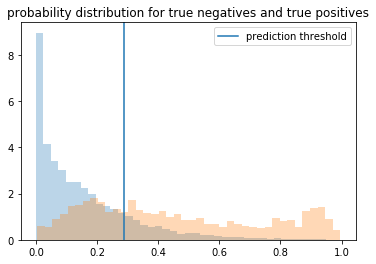

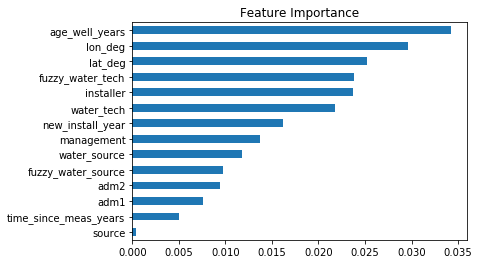

Confusion matrix, without normalization
[[7073 1415]
 [ 886 1599]]


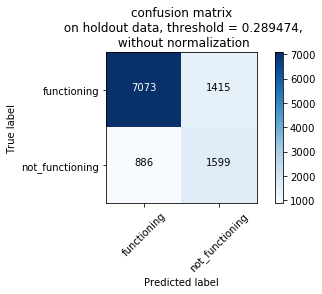

Normalized confusion matrix
[[ 0.83329406  0.16670594]
 [ 0.35653924  0.64346076]]


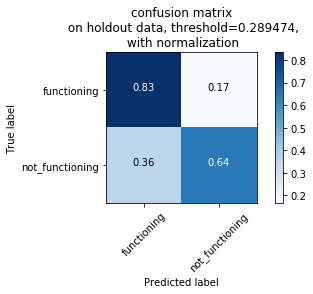

In [243]:
plot_perm_and_conmat('Sierra Leone',df, features_no_pay_sl, model_sierra_no_pay,0.289474,probs)

# Swaziland

In [ ]:
country2 = 'Swaziland'
model_swaz = pickle.load(open('Swazilan Holdout using TVH_pickle.sav', 'rb'))
y_holdout1, probs1, preds1 = summarize_country(country2,df, features, model_swaz)

In [302]:
classification_report(y_holdout1, probs1, 0.21056)

                 precision    recall  f1-score   support

    functioning       0.99      0.98      0.99      3994
not_functioning       0.91      0.96      0.93       763

    avg / total       0.98      0.98      0.98      4757

(0.91158156911581567, 0.9593709043250328, 0.93486590038314177, None)


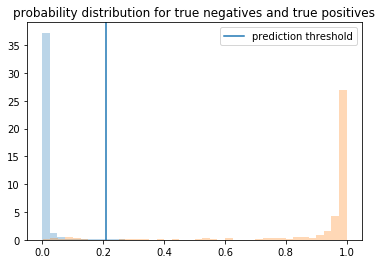

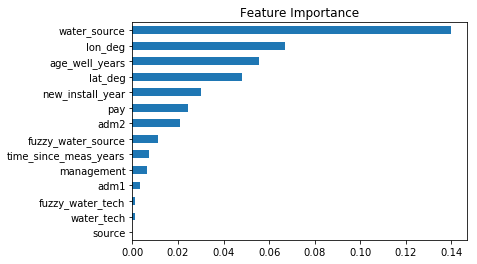

Confusion matrix, without normalization
[[3923   71]
 [  31  732]]


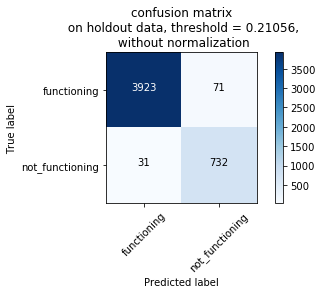

Normalized confusion matrix
[[ 0.98222334  0.01777666]
 [ 0.0406291   0.9593709 ]]


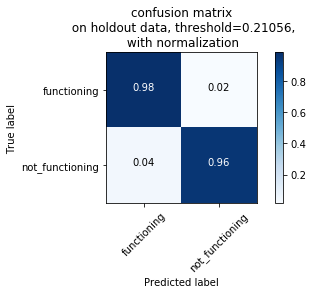

In [244]:
plot_perm_and_conmat('Swaziland',df, features, model_swaz,0.21056,probs1)

# India

In [ ]:
model_india = pickle.load(open('India_pickle.sav', 'rb'))
y_holdout2, probs2, preds2 = summarize_country('India',df, features, model_india)

In [303]:
classification_report(y_holdout2, probs2, 0.052632)

                 precision    recall  f1-score   support

    functioning       0.98      0.83      0.90      1146
not_functioning       0.07      0.47      0.12        32

    avg / total       0.96      0.82      0.88      1178

(0.070422535211267609, 0.46875, 0.12244897959183675, None)


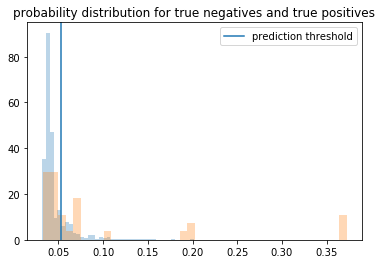

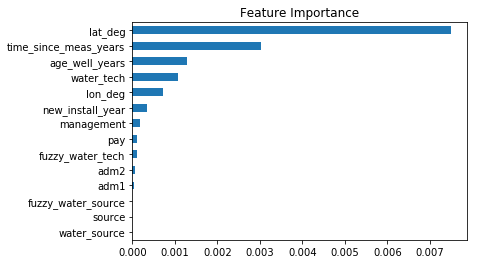

Confusion matrix, without normalization
[[948 198]
 [ 17  15]]


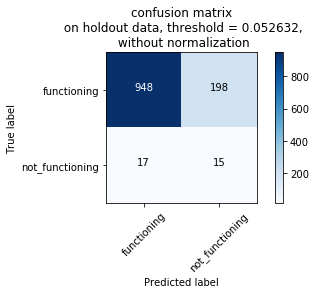

Normalized confusion matrix
[[ 0.82722513  0.17277487]
 [ 0.53125     0.46875   ]]


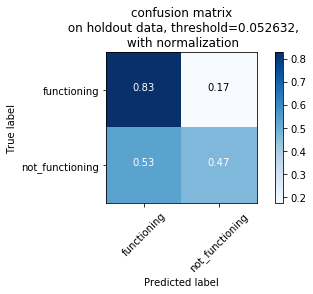

In [255]:
plot_perm_and_conmat('India',df, features, model_india,0.052632,probs2)

# Liberia

In [ ]:
model_liberia = pickle.load(open('Liberia_pickle.sav', 'rb'))
y_holdout3, probs3, preds3 = summarize_country('Liberia',df, features, model_liberia)

In [304]:
classification_report(y_holdout3, probs3, 0.237)

                 precision    recall  f1-score   support

    functioning       0.88      0.76      0.81      2084
not_functioning       0.50      0.69      0.58       722

    avg / total       0.78      0.74      0.75      2806

(0.49799599198396793, 0.68836565096952906, 0.57790697674418612, None)


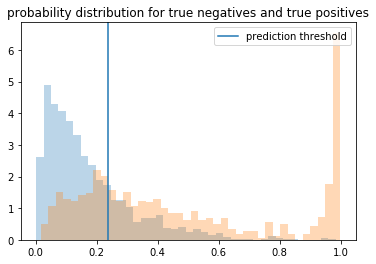

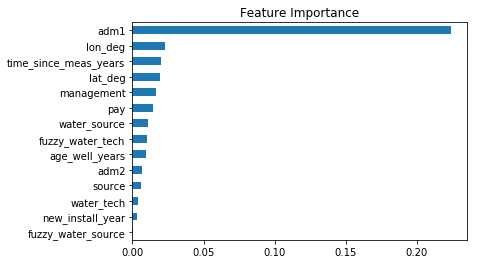

Confusion matrix, without normalization
[[1583  501]
 [ 225  497]]


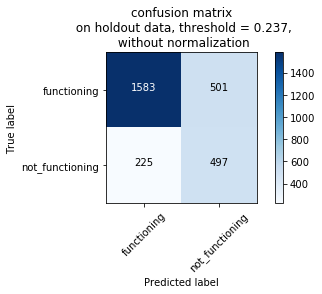

Normalized confusion matrix
[[ 0.75959693  0.24040307]
 [ 0.31163435  0.68836565]]


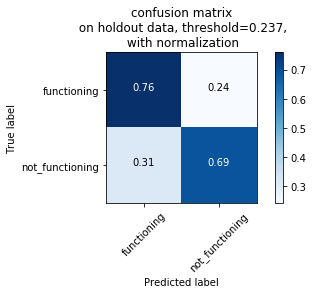

In [246]:
plot_perm_and_conmat('Liberia',df, features, model_liberia,0.237,probs3)

# Kenya

In [ ]:
model_kenya = pickle.load(open('Kenya_pickle.sav', 'rb'))
y_holdout4, probs4, preds4 = summarize_country('Kenya',df, features, model_kenya)

In [307]:
classification_report(y_holdout4, probs4, 0.25)

                 precision    recall  f1-score   support

    functioning       0.92      0.88      0.90      3644
not_functioning       0.42      0.54      0.47       578

    avg / total       0.86      0.84      0.84      4222

(0.42147651006711412, 0.54325259515570934, 0.47467876039304613, None)


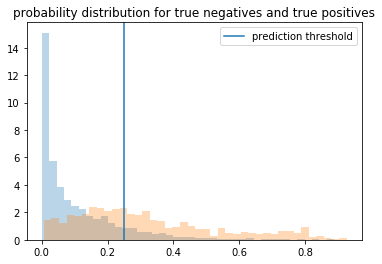

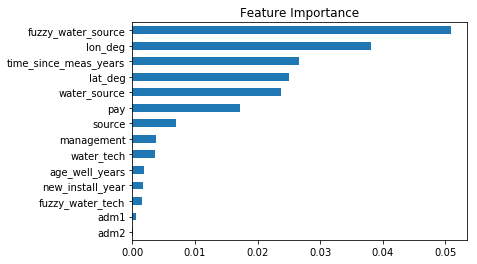

Confusion matrix, without normalization
[[3213  431]
 [ 264  314]]


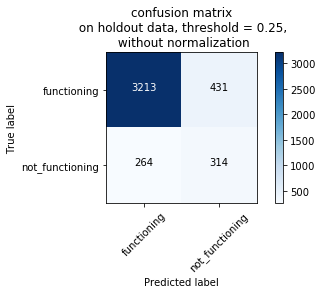

Normalized confusion matrix
[[ 0.88172338  0.11827662]
 [ 0.4567474   0.5432526 ]]


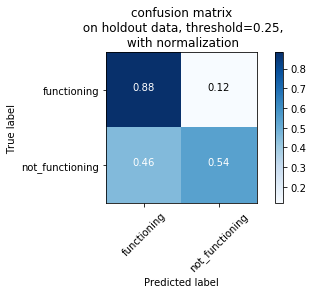

In [247]:
plot_perm_and_conmat('Kenya',df, features, model_kenya,0.25,probs4)

# Uganda

In [ ]:
model_uganda = pickle.load(open('Uganda Holdout using TVH_pickle.sav', 'rb'))
y_holdout5, probs5, preds5 = summarize_country('Uganda',df, features, model_uganda)

In [308]:
classification_report(y_holdout5, probs5, 0.236842)

                 precision    recall  f1-score   support

    functioning       0.91      0.81      0.86     17747
not_functioning       0.51      0.72      0.60      4964

    avg / total       0.82      0.79      0.80     22711

(0.51364158529580706, 0.72058823529411764, 0.59976525821596249, None)


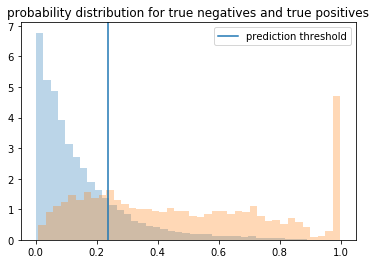

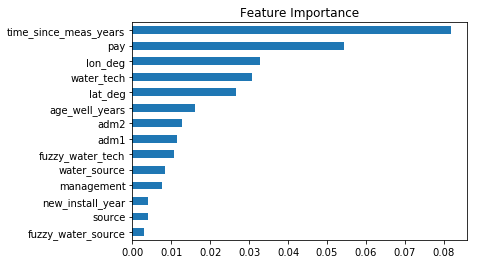

Confusion matrix, without normalization
[[14360  3387]
 [ 1387  3577]]


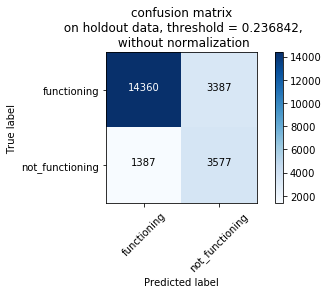

Normalized confusion matrix
[[ 0.80915084  0.19084916]
 [ 0.27941176  0.72058824]]


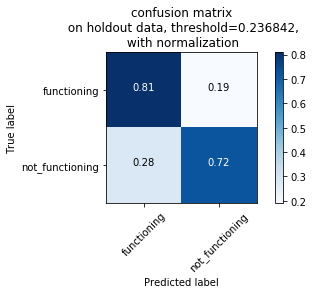

In [248]:
plot_perm_and_conmat('Uganda',df, features, model_uganda,0.236842,probs5)

# Zimbabwe

In [ ]:
model_zim = pickle.load(open('Zimbabwe_pickle.sav', 'rb'))
y_holdout6, probs6, preds6 = summarize_country('Zimbabwe',df, features, model_zim)

In [309]:
classification_report(y_holdout6, probs6, 0.25)

                 precision    recall  f1-score   support

    functioning       0.84      0.60      0.70      4715
not_functioning       0.57      0.83      0.67      3032

    avg / total       0.74      0.69      0.69      7747

(0.56925867150306053, 0.82816622691292874, 0.67472793228536887, None)


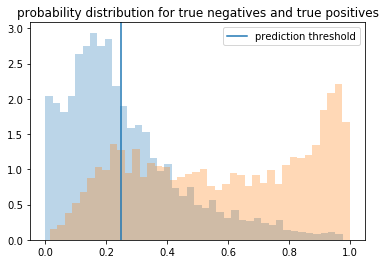

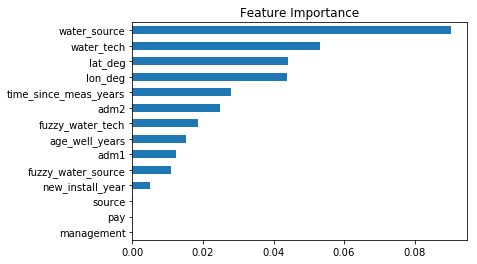

Confusion matrix, without normalization
[[2815 1900]
 [ 521 2511]]


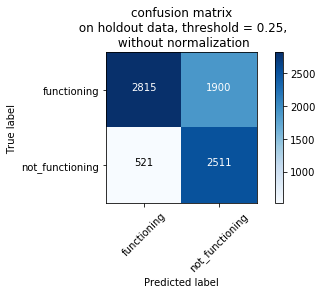

Normalized confusion matrix
[[ 0.59703075  0.40296925]
 [ 0.17183377  0.82816623]]


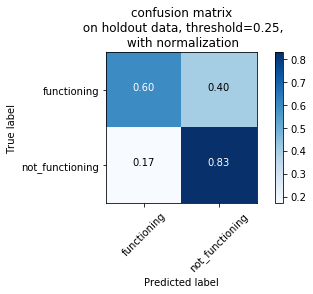

In [250]:
plot_perm_and_conmat('Zimbabwe',df, features, model_zim,0.25,probs6)

# Afghanistan

In [ ]:
model_afg = pickle.load(open('Afghanistan_pickle.sav', 'rb'))
y_holdout7, probs7, preds7 = summarize_country('Afghanistan',df, features, model_afg)

In [310]:
classification_report(y_holdout7, probs7, 0.237)

                 precision    recall  f1-score   support

    functioning       0.90      0.68      0.77      8399
not_functioning       0.52      0.81      0.63      3571

    avg / total       0.78      0.72      0.73     11970

(0.51736420302760466, 0.81349761971436574, 0.6324842151099499, None)


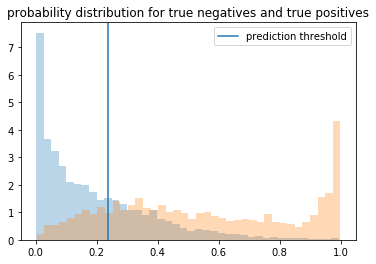

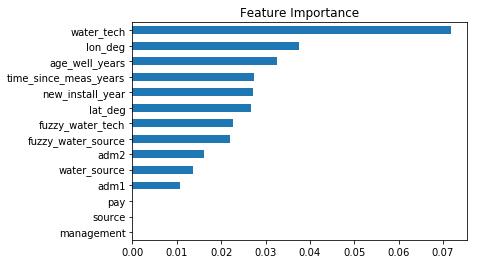

Confusion matrix, without normalization
[[5689 2710]
 [ 666 2905]]


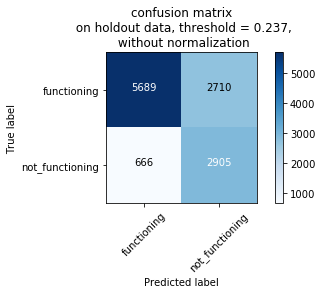

Normalized confusion matrix
[[ 0.67734254  0.32265746]
 [ 0.18650238  0.81349762]]


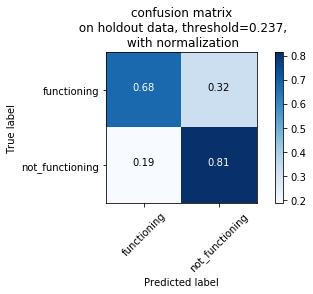

In [252]:
plot_perm_and_conmat('Afghanistan',df, features, model_afg,0.237,probs7)

# South Sudan

In [ ]:
model_ss = pickle.load(open('South Sudan_pickle.sav', 'rb'))
y_holdout8, probs8, preds8 = summarize_country('South Sudan',df, features, model_ss)

In [311]:
classification_report(y_holdout8, probs8, 0.34)

                 precision    recall  f1-score   support

    functioning       0.87      0.88      0.87       962
not_functioning       0.53      0.52      0.53       256

    avg / total       0.80      0.80      0.80      1218

(0.52964426877470361, 0.5234375, 0.52652259332023577, None)


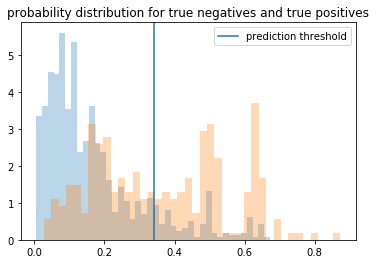

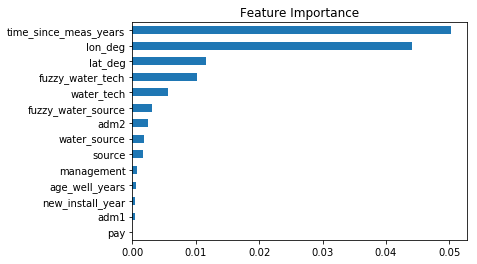

Confusion matrix, without normalization
[[843 119]
 [122 134]]


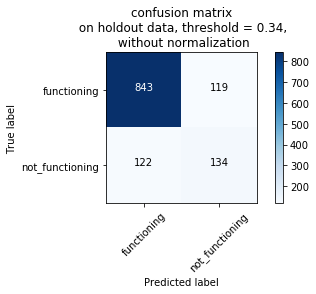

Normalized confusion matrix
[[ 0.87629938  0.12370062]
 [ 0.4765625   0.5234375 ]]


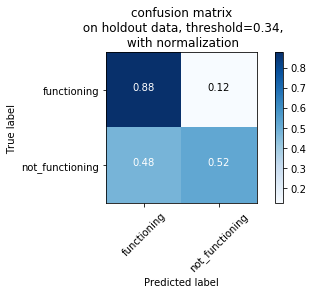

In [253]:
plot_perm_and_conmat('South Sudan',df, features, model_ss,0.34,probs8)

# Malawi

In [ ]:
model_mal = pickle.load(open('Malawi_pickle.sav', 'rb'))
y_holdout9, probs9, preds9 = summarize_country('Malawi',df, features, model_mal)

In [312]:
classification_report(y_holdout9, probs9, 0.237)

                 precision    recall  f1-score   support

    functioning       0.91      0.77      0.84      1830
not_functioning       0.53      0.78      0.63       609

    avg / total       0.82      0.77      0.78      2439

(0.52954292084726873, 0.77996715927750415, 0.63081009296148738, None)


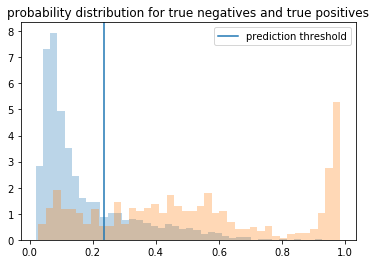

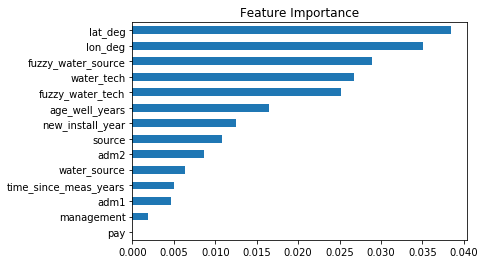

Confusion matrix, without normalization
[[1408  422]
 [ 134  475]]


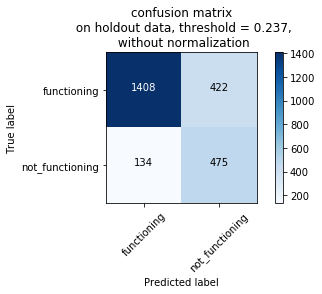

Normalized confusion matrix
[[ 0.76939891  0.23060109]
 [ 0.22003284  0.77996716]]


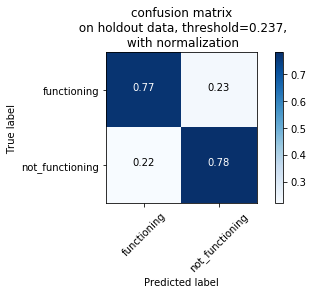

In [254]:
plot_perm_and_conmat('Malawi',df, features, model_mal,0.237,probs9)

# combine results

In [26]:
slr = pd.read_csv('Sierra Leone_summary.csv')
swr = pd.read_csv('Swaziland_summary.csv')
ugr = pd.read_csv('Uganda_summary.csv')
kr = pd.read_csv('Kenya_summary.csv')
afgr = pd.read_csv('Afghanistan_summary.csv')
mr = pd.read_csv('Malawi_summary.csv')
sr = pd.read_csv('South Sudan_summary.csv')
ir = pd.read_csv('India_summary.csv')
lr = pd.read_csv('Liberia_summary.csv')
zr = pd.read_csv('Zimbabwe_summary.csv')

In [28]:
slr['country']='Sierra Leone'
swr['country'] = 'Swaziland'
ugr['country']= 'Uganda'
kr['country']= 'Kenya'
afgr['country']='Afghansitan'
mr['country']='Malawi'
sr['country']='South Sudan'
ir['country']='India'
lr['country']='Liberia'
zr['country']='Zimbabwe'

In [57]:
results_table = pd.concat([slr,swr, ugr,kr, afgr, mr, sr, ir, lr, zr], axis=0)

In [58]:
results_table.rename(columns={'Unnamed: 0': 'measure'}, inplace=True)

In [60]:
results_table.reset_index(inplace=True)
results_table.drop('index', axis=1, inplace=True)
#results_table.drop('level_0', inplace=True)

                   

In [62]:
results_table.to_csv('summary_results_by_country.csv')

# Combine Fuzzy Water Tech

In [96]:
slr = pd.read_csv('Sierra Leone_waterpoint_function_by_fuzzy_water_tech.csv')
swr = pd.read_csv('Swaziland_waterpoint_function_by_fuzzy_water_tech.csv')
ugr = pd.read_csv('Uganda_waterpoint_function_by_fuzzy_water_tech.csv')
kr = pd.read_csv('Kenya_waterpoint_function_by_fuzzy_water_tech.csv')
afgr = pd.read_csv('Afghanistan_waterpoint_function_by_fuzzy_water_tech.csv')
mr = pd.read_csv('Malawi_waterpoint_function_by_fuzzy_water_tech.csv')
sr = pd.read_csv('South Sudan_waterpoint_function_by_fuzzy_water_tech.csv')
ir = pd.read_csv('India_waterpoint_function_by_fuzzy_water_tech.csv')
lr = pd.read_csv('Liberia_waterpoint_function_by_fuzzy_water_tech.csv')
zr = pd.read_csv('Zimbabwe_waterpoint_function_by_fuzzy_water_tech.csv')

In [97]:
slr['country']='Sierra Leone'
swr['country'] = 'Swaziland'
ugr['country']= 'Uganda'
kr['country']= 'Kenya'
afgr['country']='Afghansitan'
mr['country']='Malawi'
sr['country']='South Sudan'
ir['country']='India'
lr['country']='Liberia'
zr['country']='Zimbabwe'

In [98]:
results_table2 = pd.concat([slr,swr, ugr,kr, afgr, mr, sr, ir, lr, zr], axis=0)

In [99]:
#results_table2.rename(columns={'Unnamed: 0': 'measure'}, inplace=True)
results_table2.drop('Unnamed: 0', axis=1, inplace=True)
results_table2.reset_index(inplace=True)
results_table2.drop('index', axis=1, inplace=True)
#results_table.drop('level_0', inplace=True)


In [100]:
results_table2.head()

,fuzzy_water_tech,# functioning,# not functioning,percentage_broken,country
0,__MISSING__,8688.0,4416.0,33.70,Sierra Leone
1,India Mark MK IMK II,12582.0,4235.0,25.18,Sierra Leone
2,Bucket,13358.0,1051.0,7.29,Sierra Leone
3,Gravity,2181.0,978.0,30.96,Sierra Leone
4,Kardia,3237.0,710.0,17.99,Sierra Leone


In [101]:
results_table2.to_csv('country_waterpoint_status_by_fuzzy_water_tech.csv')

# by fuzzy water source

In [102]:
slr = pd.read_csv('Sierra Leone_waterpoint_function_by_fuzzy_water_source.csv')
swr = pd.read_csv('Swaziland_waterpoint_function_by_fuzzy_water_source.csv')
ugr = pd.read_csv('Uganda_waterpoint_function_by_fuzzy_water_source.csv')
kr = pd.read_csv('Kenya_waterpoint_function_by_fuzzy_water_source.csv')
afgr = pd.read_csv('Afghanistan_waterpoint_function_by_fuzzy_water_source.csv')
mr = pd.read_csv('Malawi_waterpoint_function_by_fuzzy_water_source.csv')
sr = pd.read_csv('South Sudan_waterpoint_function_by_fuzzy_water_source.csv')
ir = pd.read_csv('India_waterpoint_function_by_fuzzy_water_source.csv')
lr = pd.read_csv('Liberia_waterpoint_function_by_fuzzy_water_source.csv')
zr = pd.read_csv('Zimbabwe_waterpoint_function_by_fuzzy_water_source.csv')

In [103]:
slr['country']='Sierra Leone'
swr['country'] = 'Swaziland'
ugr['country']= 'Uganda'
kr['country']= 'Kenya'
afgr['country']='Afghansitan'
mr['country']='Malawi'
sr['country']='South Sudan'
ir['country']='India'
lr['country']='Liberia'
zr['country']='Zimbabwe'

In [104]:
results_table3 = pd.concat([slr,swr, ugr,kr, afgr, mr, sr, ir, lr, zr], axis=0)

In [105]:
#results_table2.rename(columns={'Unnamed: 0': 'measure'}, inplace=True)
results_table3.drop('Unnamed: 0', axis=1, inplace=True)
results_table3.reset_index(inplace=True)
results_table3.drop('index', axis=1, inplace=True)
#results_table.drop('level_0', inplace=True)

In [106]:
results_table3.to_csv('country_waterpoint_status_by_fuzzy_water_source.csv')

In [109]:
results_table3.head()

,fuzzy_water_source,# functioning,# not functioning,percentage_broken,country
0,Well,30182.0,7238.0,19.34,Sierra Leone
1,Stand Post Tap,7614.0,3959.0,34.21,Sierra Leone
2,Borehole,1632.0,455.0,21.80,Sierra Leone
3,Piped,1497.0,403.0,21.21,Sierra Leone
4,Tank,421.0,145.0,25.62,Sierra Leone


# by most important feature

In [110]:
slr = pd.read_csv('Sierra Leone_waterpoint_function_by_age_well_years.csv')
swr = pd.read_csv('Swaziland_waterpoint_function_by_water_source.csv')
ugr = pd.read_csv('Uganda_waterpoint_function_by_time_since_meas_years.csv')
kr = pd.read_csv('Kenya_waterpoint_function_by_fuzzy_water_source.csv')
afgr = pd.read_csv('Afghanistan_waterpoint_function_by_water_tech.csv')
mr = pd.read_csv('Malawi_waterpoint_function_by_lat_deg.csv')
sr = pd.read_csv('South Sudan_waterpoint_function_by_time_since_meas_years.csv')
ir = pd.read_csv('India_waterpoint_function_by_lat_deg.csv')
lr = pd.read_csv('Liberia_waterpoint_function_by_adm1.csv')
zr = pd.read_csv('Zimbabwe_waterpoint_function_by_water_source.csv')

In [111]:
slr['country']='Sierra Leone'
swr['country'] = 'Swaziland'
ugr['country']= 'Uganda'
kr['country']= 'Kenya'
afgr['country']='Afghansitan'
mr['country']='Malawi'
sr['country']='South Sudan'
ir['country']='India'
lr['country']='Liberia'
zr['country']='Zimbabwe'

In [118]:
slr['most_important_feature']=slr.columns[1]
slr.rename(columns={ slr.columns[1]: "feature_value" }, inplace=True)

swr['most_important_feature']=swr.columns[1]
swr.rename(columns={ swr.columns[1]: "feature_value" }, inplace=True)

ugr['most_important_feature']=ugr.columns[1]
ugr.rename(columns={ ugr.columns[1]: "feature_value" }, inplace=True)

kr['most_important_feature']=kr.columns[1]
kr.rename(columns={ kr.columns[1]: "feature_value" }, inplace=True)

afgr['most_important_feature']=afgr.columns[1]
afgr.rename(columns={ afgr.columns[1]: "feature_value" }, inplace=True)

mr['most_important_feature']=mr.columns[1]
mr.rename(columns={ mr.columns[1]: "feature_value" }, inplace=True)

sr['most_important_feature']=sr.columns[1]
sr.rename(columns={ sr.columns[1]: "feature_value" }, inplace=True)

ir['most_important_feature']=ir.columns[1]
ir.rename(columns={ ir.columns[1]: "feature_value" }, inplace=True)

lr['most_important_feature']=lr.columns[1]
lr.rename(columns={ lr.columns[1]: "feature_value" }, inplace=True)

zr['most_important_feature']=zr.columns[1]
zr.rename(columns={ zr.columns[1]: "feature_value" }, inplace=True)

In [121]:
results_table4= pd.concat([slr,swr, ugr,kr, afgr, mr, sr, ir, lr, zr], axis=0)

In [123]:
results_table4.drop('Unnamed: 0', axis=1, inplace=True)
results_table4.reset_index(inplace=True)
results_table4.drop('index', axis=1, inplace=True)

In [125]:
results_table4.columns

Index(['feature_value', '# functioning', '# not functioning',
       'percentage_broken', 'country', 'most_important_feature'],
      dtype='object')

In [126]:
cols=['country','most_important_feature','feature_value','# functioning', '# not functioning',
       'percentage_broken',]

In [127]:
results_table4 = results_table4[cols]

In [128]:
results_table4

,country,most_important_feature,feature_value,# functioning,# not functioning,percentage_broken
0,Sierra Leone,age_well_years,274,3047.0,2532.0,45.38
1,Sierra Leone,age_well_years,9.1,1186.0,262.0,18.09
2,Sierra Leone,age_well_years,3.7,588.0,199.0,25.29
3,Sierra Leone,age_well_years,4.1,870.0,195.0,18.31
4,Sierra Leone,age_well_years,3.1,1032.0,193.0,15.76
5,Sierra Leone,age_well_years,6.1,668.0,172.0,20.48
6,Sierra Leone,age_well_years,7.1,544.0,158.0,22.51
7,Sierra Leone,age_well_years,6.6,361.0,156.0,30.17
8,Sierra Leone,age_well_years,2.1,1466.0,153.0,9.45
9,Sierra Leone,age_well_years,3.6,559.0,150.0,21.16


In [132]:
results_table4[results_table4.most_important_feature=='age_well_years'].feature_value.replace([274], ['__MISSING__'], inplace=True)


In [134]:
results_table4.feature_value.replace([274], ['__MISSING__'], inplace=True)


In [136]:
results_table4.to_csv('country_waterpoint_status_by_most_important_feature.csv')

# Only keep most current measurement when there are two measurements

In [149]:
def remove_dups(df):
    #create a min and a max date
    print("shape",df.shape)
    df['mindate'] = df.groupby('wpdx_id')["new_report_date"].transform('min')
    df['maxdate'] = df.groupby('wpdx_id')["new_report_date"].transform('max')
    
    #only keep dates where the report date is the "max_date", or second measurement
    df = df[df.new_report_date == df.maxdate]
    df.drop(['mindate', 'maxdate'], axis=1, inplace=True)
    print("new shape", df.shape)
    df2 = df.copy()
    return df2

In [150]:
afg = pd.read_csv('Afghanistan_w_outyear_predictions_coerced.csv')

In [151]:
afg2 = remove_dups(afg)

shape (59849, 49)
new shape (58121, 49)


In [152]:
afg2.to_csv('Afghanistan_w_outyear_predictions_coerced_no_dups.csv')

In [154]:
afg2.shape

(58121, 49)

In [ ]:
slr = pd.read_csv('Sierra_Leone_w_outyear_predictions_coerced_no_pay.csv')
slr2 = remove_dups(slr)
slr2.to_csv('Sierra_Leone_w_outyear_predictions_coerced_no_pay_no_dups.csv')

swr = pd.read_csv('Swaziland_w_outyear_predictions_coerced.csv')
swr2 = remove_dups(swr)
swr2.to_csv('Swaziland_w_outyear_predictions_coerced_no_dups.csv')

ugr = pd.read_csv('Uganda_w_outyear_predictions_coerced.csv')
ugr2 = remove_dups(ugr)
ugr2.to_csv('Uganda_w_outyear_predictions_coerced_no_dups.csv')

kr = pd.read_csv('Kenya_w_outyear_predictions_coerced.csv')
kr2 = remove_dups(kr)
kr2.to_csv('Kenya_w_outyear_predictions_coerced_no_dups.csv')

#afgr = pd.read_csv('Afghanistan_waterpoint_function_by_water_tech.csv')
mr = pd.read_csv('Malawi_w_outyear_predictions_coerced.csv')
mr2 = remove_dups(mr)
mr2.to_csv('Malawi_w_outyear_predictions_coerced_no_dups.csv')

sr = pd.read_csv('SouthSudan_w_outyear_predictions_coerced.csv')
sr2 = remove_dups(sr)
sr2.to_csv('SouthSudan_w_outyear_predictions_coerced_no_dups.csv')

ir = pd.read_csv('India_w_outyear_predictions_coerced.csv')
ir2 = remove_dups(ir)
ir2.to_csv('India_w_outyear_predictions_coerced_no_dups.csv')


In [162]:
lr = pd.read_csv('Liberia_w_outyear_predictions_coerced.csv')
lr2 = remove_dups(lr)
lr2.to_csv('Liberia_w_outyear_predictions_coerced_no_dups.csv')

shape (14028, 49)
new shape (13504, 49)


In [163]:
zr = pd.read_csv('Zimbabwe_w_outyear_predictions_coerced.csv')
zr2= remove_dups(zr)
zr2.to_csv('Zimbabwe_w_outyear_predictions_coerced_no_dups.csv')

shape (38733, 49)
new shape (38082, 49)


In [301]:
def classification_report(y_holdout, probs, threshold):
    names = ['functioning', 'not_functioning']
    new_preds = np.where(probs>threshold, 1, 0)
    #classification report
    print(metrics.classification_report(y_holdout, new_preds, target_names=names))
    print(metrics.precision_recall_fscore_support(y_holdout, new_preds, average='binary',labels=names))